In [57]:
# Import packages
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [58]:
# Specify output categories for NN and path to get training/validation images
move_type = 'Forward', 'Right', 'Left'
path = Path("Images-Marchese")

In [59]:
# Getting images from specified path
fns = get_image_files(path)
fns

(#646) [Path('Images-Marchese/Forward/forward_move238.png'),Path('Images-Marchese/Forward/forward_move339.png'),Path('Images-Marchese/Forward/forward_move224.png'),Path('Images-Marchese/Forward/forward_move258.png'),Path('Images-Marchese/Forward/forward_move190.png'),Path('Images-Marchese/Forward/forward_move94.png'),Path('Images-Marchese/Forward/forward_move195.png'),Path('Images-Marchese/Forward/forward_move160.png'),Path('Images-Marchese/Forward/forward_move266.png'),Path('Images-Marchese/Forward/forward_move253.png')...]

In [60]:
# Verify all images in path
failed = verify_images(fns)
failed

(#0) []

In [61]:
# Creating DataLoader object for directions
movement = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

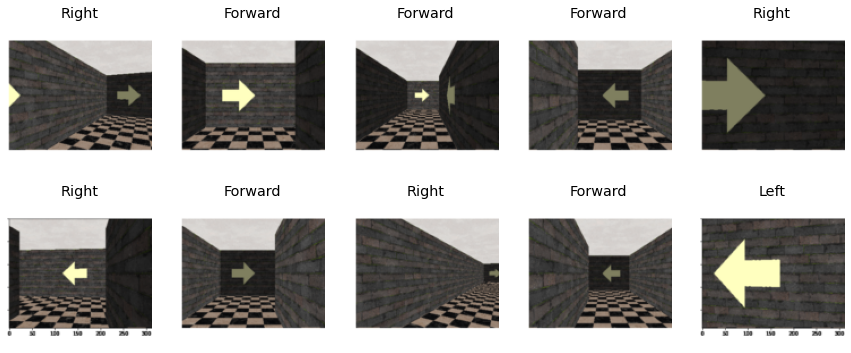

In [62]:
# Checking the labeling of the images
dls = movement.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

In [63]:
# Training the model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.628311,0.570896,0.248062,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.738367,0.340858,0.155039,00:03
1,0.539173,0.130917,0.062016,00:02
2,0.399458,0.070113,0.015504,00:03
3,0.326560,0.057452,0.015504,00:02


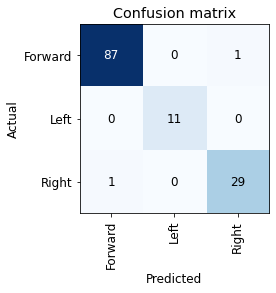

In [64]:
# Seeing where the model may have gotten confused in classification
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

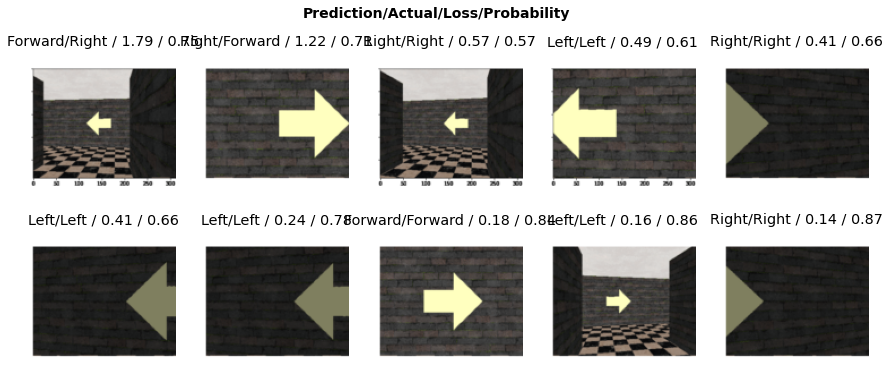

In [65]:
# Looking at the images that most confused the NN
interp.plot_top_losses(10, nrows=2)

In [66]:
# Loading in GUI that helps clean the data set
cleaner = ImageClassifierCleaner(learn)
cleaner

In [67]:
# Delete specified images in cleaner
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    
# Move specified images in cleaner
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [68]:
# Export model for future use
learn.export(os.path.abspath('Move_NN.pkl'))